# Lecture Notebook 7

1. White board stuff on rk2_1d
2. rk2_1d.py
3. Example

In [1]:
%cd '/home/cody/Physics 331/Textbook Programs/Chapter 4'
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 4
'Error vs Run Time.png'  'Euler vs. RK2.png'   rk2_1d.py      Untitled.ipynb
 euler_1d.py             'READ ME.txt'         sky_diver.py


In [5]:
# %load rk2_1d.py
import numpy as np
def rk2_1d(y0, t0, tf, dt, deriv_func):
    """
    Numerically solve the first order ODE deriv_func using Eulers method

    Inputs
    ----------
    y0:         Starting dependent-variable value
    t0, tf:     Starting and ending independent-variable value
    dt:         Size of the step I want to take.
    deriv_func: Function that I am trying to numerically solve.

    Outputs
    ----------
    t: Array of independent-variable values
        t = [t[0], t[1], t[2], ..., t[n_steps]]
    y: Array of corresponding dependent-variable values
        y = [y[0], y[1], y[2], ..., y[n_steps]]
    """
    t = np.arange(t0, tf+dt, dt)#Array of all the times we want
    n_steps = len(t)            #Number of steps to get to tf

    y  = np.zeros(n_steps)      #Empty array I want to put answers into
    y[0] = y0                   #Initial condition
    for n in range(n_steps-1):
        #Take a half step
        f = deriv_func(y[n],t[n])
        y_star = y[n] + 0.5 * dt * f

        #Now take the full step
        t_star = t[n] + 0.5 * dt
        f_star = deriv_func(y_star, t_star)
        y[n+1] = (y[n] + dt*f_star)

    return t, y


In [6]:
# %load euler_1d.py
import numpy as np
def euler_1d(y0, t0, tf, dt, deriv_func):
    """
    Numerically solve the first order ODE deriv_func using Eulers method

    Inputs
    ----------
    y0:         Starting dependent-variable value
    t0, tf:     Starting and ending independent-variable value
    dt:         Size of the step I want to take.
    deriv_func: Function that I am trying to numerically solve.

    Outputs
    ----------
    t: Array of independent-variable values
        t = [t[0], t[1], t[2], ..., t[n_steps]]
    y: Array of corresponding dependent-variable values
        y = [y[0], y[1], y[2], ..., y[n_steps]]
    """

    t = np.arange(t0, tf+dt, dt)   #starts at t0 and makes steps of size dt. Does not
                                   #get to tf. It gets as Close as it can to tf, but
                                   #will always stop short of it.
    n_steps = len(t)        #Number of steps to take
    y = np.zeros(n_steps)   #I want to make an array of zeros that I'll then put
                            #y-values into. This is a good practice because it
                            #forces the computer to allocate enough memory for the
                            #final answer and can prevent memory problems
 
    #Set the first element of the array to be our input starting value y0
    y[0] = y0
    for n in range(n_steps-1):
        f = deriv_func(y[n], t[n])  #Evaluate the function f(y,t)
        y[n+1] = (y[n] + dt * f)    #This is the Euler's method part.
    return t, y

# Example

Last week we looked at radioactive decay,lets look at it again with our two different methods

\begin{equation}
\frac{dN}{dt} = -\lambda N
\end{equation}

In [3]:
def dNdt(N,t):
    """
    Differential equation for radioactive decay dN/dt = -lamda*N
    
    Inputs
    ----------
    N:  Number of atoms
    t:  time
    
    Output
    ----------
    dN/dt:  Right hand side of the differential we want to solve
    """
    lam = 3.9e-12 #Decay constant for Carbon 14 half life of about 5700 years (s**-1)
    return -lam*N

#Exact solution
def decay(N0, lam,t):
    return N0 * np.exp(-lam*t)

In [7]:
num_of_atoms = 6.022e23 #Number of atoms I want to start with (1 mole)
year = 3.154e7 #Number of seconds in a year
t_final = 50000*year #How long I want to wait for this to decay. (0,000 Years) (s)
dt = 5000*year
#Euler's method
t, N = euler_1d(num_of_atoms, 0, t_final, dt, dNdt)
t2, N2 = euler_1d(num_of_atoms, 0, t_final, dt/2, dNdt)

#RK2 method
t3, N3 = rk2_1d(num_of_atoms, 0, t_final, dt, dNdt)
t4, N4 = rk2_1d(num_of_atoms, 0, t_final, dt/2, dNdt)

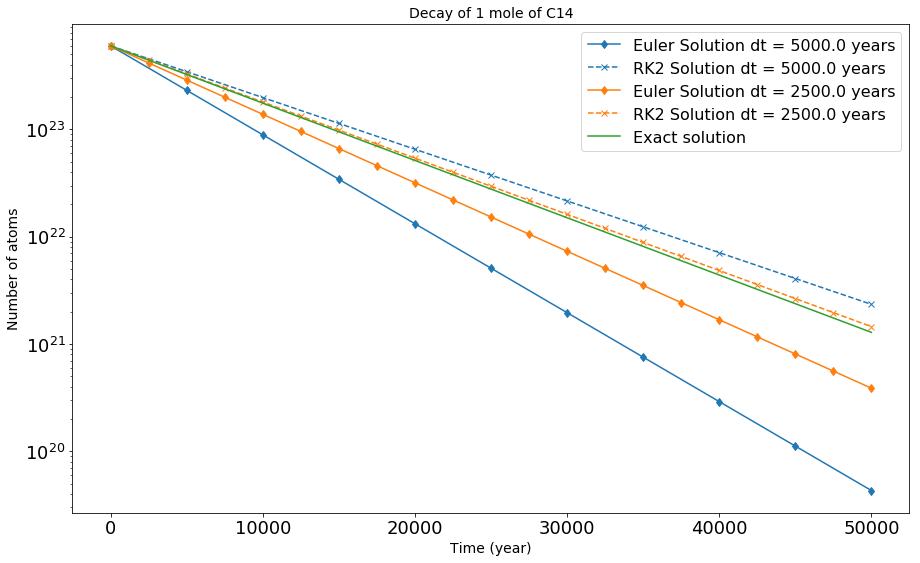

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,9))
plt.plot(t/year, N, 'd-', color = 'C0', label = 'Euler Solution dt = {} years'.format(dt/year)) #Plot our numerical solution
plt.plot(t3/year, N3, 'x--', color = 'C0', label = 'RK2 Solution dt = {} years'.format(dt/year)) #Plot our numerical solution

plt.plot(t2/year, N2, 'd-', color = 'C1', label = 'Euler Solution dt = {} years'.format(dt/2/year))
plt.plot(t4/year, N4, 'x--', color = 'C1', label = 'RK2 Solution dt = {} years'.format(dt/2/year))

t_foo = np.linspace(0, t_final, 1000000)
plt.plot(t_foo/year,decay(num_of_atoms, 3.9e-12, t_foo),color = 'C2', label = 'Exact solution')  #Plot the exact solution

plt.ylabel('Number of atoms', size = 14)
plt.yscale('log')

plt.xticks(size = 18)
plt.yticks(size = 18)

plt.xlabel('Time (year)', size = 14)
plt.title('Decay of 1 mole of C14', size = 14)
plt.legend(prop={'size': 16})

plt.show()

Plot the errors between the different answers

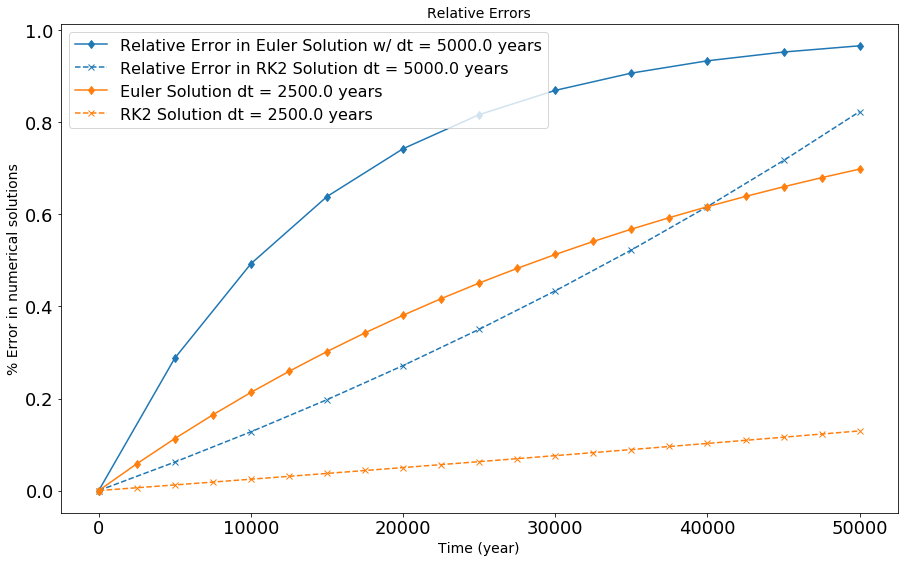

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,9))

#Finding relative error (Exact - Aprox)/Exact 
rel_error = np.abs(decay(num_of_atoms, 3.9e-12, t) -N)/decay(num_of_atoms, 3.9e-12, t)
rel_error2 = np.abs(decay(num_of_atoms, 3.9e-12, t2) -N2)/decay(num_of_atoms, 3.9e-12, t2)

rel_error3 = np.abs(decay(num_of_atoms, 3.9e-12, t3) -N3)/decay(num_of_atoms, 3.9e-12, t3)
rel_error4 = np.abs(decay(num_of_atoms, 3.9e-12, t4) -N4)/decay(num_of_atoms, 3.9e-12, t4)

plt.plot(t/year, rel_error, 'd-', color = 'C0', label = 'Relative Error in Euler Solution w/ dt = {} years'.format(dt/year)) #Plot our numerical solution
plt.plot(t3/year, rel_error3, 'x--', color = 'C0', label = 'Relative Error in RK2 Solution dt = {} years'.format(dt/year)) #Plot our numerical solution

plt.plot(t2/year, rel_error2, 'd-', color = 'C1', label = 'Euler Solution dt = {} years'.format(dt/2/year))
plt.plot(t4/year, rel_error4, 'x--', color = 'C1', label = 'RK2 Solution dt = {} years'.format(dt/2/year))

plt.ylabel('% Error in numerical solutions', size = 14)

plt.xticks(size = 18)
plt.yticks(size = 18)

plt.xlabel('Time (year)', size = 14)
plt.title('Relative Errors', size = 14)
plt.legend(prop={'size': 16})

plt.show()

### Run time

In [11]:
run_times_euler = []
rel_error_euler = []
run_times_rk2 = []
rel_error_rk2 = []
for t in range(6):
    t_foo = %timeit -o euler_1d(num_of_atoms, 0, t_final, dt/10**t, dNdt)
    t0, n0 = euler_1d(num_of_atoms, 0, t_final, dt/10**t, dNdt)
    exact_ans = decay(num_of_atoms, 3.9e-12, t_final)
    run_times_euler.append(t_foo.average)
    rel_error_euler.append(np.abs(exact_ans- n0[-1])/exact_ans)
    
    t_foo = %timeit -o rk2_1d(num_of_atoms, 0, t_final, dt/10**t, dNdt)
    t0, n0 = rk2_1d(num_of_atoms, 0, t_final, dt/10**t, dNdt)
    exact_ans = decay(num_of_atoms, 3.9e-12, t_final)
    run_times_rk2.append(t_foo.average)
    rel_error_rk2.append(np.abs(exact_ans- n0[-1])/exact_ans)

7.34 µs ± 107 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
13.6 µs ± 234 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
60 µs ± 4.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
120 µs ± 535 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
563 µs ± 3.12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.16 ms ± 4.16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.69 ms ± 20.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.7 ms ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
57 ms ± 180 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
111 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
569 ms ± 35.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.1 s ± 7.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


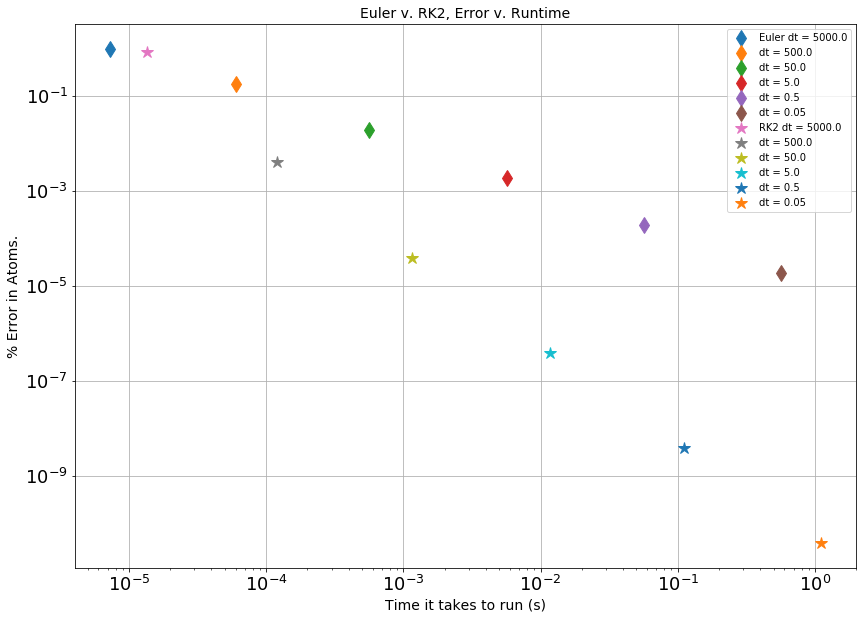

In [12]:
fig = plt.figure(figsize = (14,10))
#plt.title('Error vs. Run time for euler_1d solving sky_diver', size = 14)
plt.plot(run_times_euler[0], rel_error_euler[0],'d',label = 'Euler dt = {}'.format(dt/year), markersize = 12)
plt.plot(run_times_euler[1], rel_error_euler[1],'d',label = 'dt = {}'.format(dt/year/10), markersize = 12)
plt.plot(run_times_euler[2], rel_error_euler[2],'d',label = 'dt = {}'.format(dt/year/10**2), markersize = 12)
plt.plot(run_times_euler[3], rel_error_euler[3],'d',label = 'dt = {}'.format(dt/year/10**3), markersize = 12)
plt.plot(run_times_euler[4], rel_error_euler[4],'d',label = 'dt = {}'.format(dt/year/10**4), markersize = 12)
plt.plot(run_times_euler[5], rel_error_euler[5],'d',label = 'dt = {}'.format(dt/year/10**5), markersize = 12)

plt.plot(run_times_rk2[0], rel_error_rk2[0],'*',label = 'RK2 dt = {}'.format(dt/year), markersize = 12)
plt.plot(run_times_rk2[1], rel_error_rk2[1],'*',label = 'dt = {}'.format(dt/year/10), markersize = 12)
plt.plot(run_times_rk2[2], rel_error_rk2[2],'*',label = 'dt = {}'.format(dt/year/10**2), markersize = 12)
plt.plot(run_times_rk2[3], rel_error_rk2[3],'*',label = 'dt = {}'.format(dt/year/10**3), markersize = 12)
plt.plot(run_times_rk2[4], rel_error_rk2[4],'*',label = 'dt = {}'.format(dt/year/10**4), markersize = 12)
plt.plot(run_times_rk2[5], rel_error_rk2[5],'*',label = 'dt = {}'.format(dt/year/10**5), markersize = 12)

plt.title('Euler v. RK2, Error v. Runtime', size = 14)
plt.xlabel('Time it takes to run (s)', size = 14)
plt.ylabel('% Error in Atoms.', size = 14)

plt.xscale('log')
plt.yscale('log')
plt.yticks(size = 18)
plt.xticks(size = 18)
plt.grid()
plt.legend()
plt.show()

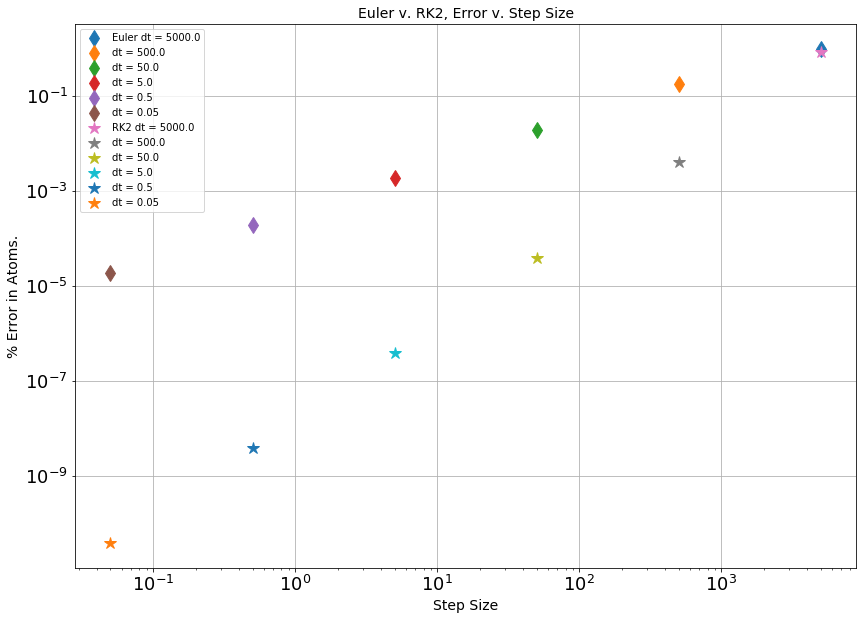

In [13]:
fig = plt.figure(figsize = (14,10))
#plt.title('Error vs. Run time for euler_1d solving sky_diver', size = 14)
plt.plot(dt/year, rel_error_euler[0],'d',label = 'Euler dt = {}'.format(dt/year), markersize = 12)
plt.plot(dt/year/10**1, rel_error_euler[1],'d',label = 'dt = {}'.format(dt/year/10), markersize = 12)
plt.plot(dt/year/10**2, rel_error_euler[2],'d',label = 'dt = {}'.format(dt/year/10**2), markersize = 12)
plt.plot(dt/year/10**3, rel_error_euler[3],'d',label = 'dt = {}'.format(dt/year/10**3), markersize = 12)
plt.plot(dt/year/10**4, rel_error_euler[4],'d',label = 'dt = {}'.format(dt/year/10**4), markersize = 12)
plt.plot(dt/year/10**5, rel_error_euler[5],'d',label = 'dt = {}'.format(dt/year/10**5), markersize = 12)

plt.plot(dt/year/10**0, rel_error_rk2[0],'*',label = 'RK2 dt = {}'.format(dt/year), markersize = 12)
plt.plot(dt/year/10**1, rel_error_rk2[1],'*',label = 'dt = {}'.format(dt/year/10), markersize = 12)
plt.plot(dt/year/10**2, rel_error_rk2[2],'*',label = 'dt = {}'.format(dt/year/10**2), markersize = 12)
plt.plot(dt/year/10**3, rel_error_rk2[3],'*',label = 'dt = {}'.format(dt/year/10**3), markersize = 12)
plt.plot(dt/year/10**4, rel_error_rk2[4],'*',label = 'dt = {}'.format(dt/year/10**4), markersize = 12)
plt.plot(dt/year/10**5, rel_error_rk2[5],'*',label = 'dt = {}'.format(dt/year/10**5), markersize = 12)

plt.title('Euler v. RK2, Error v. Step Size', size = 14)
plt.xlabel('Step Size', size = 14)
plt.ylabel('% Error in Atoms.', size = 14)

plt.xscale('log')
plt.yscale('log')
plt.yticks(size = 18)
plt.xticks(size = 18)
plt.grid()
plt.legend()
plt.show()